In [67]:
import pandas as pd
df = pd.read_csv('timeseries_20200131a_151719_UTC.txt', header = None,names = ['time','temperature'])
df['temperature'] = df.loc[:,'temperature']+273 
df

,time,temperature
0,0.000000,274.302608
1,0.010000,279.030888
2,0.020237,289.975105
3,0.030237,282.933916
4,0.040237,272.556488
...,...,...
117095,1175.542000,284.233942
117096,1175.552000,268.861949
117097,1175.562000,269.940479
117098,1175.572300,284.345838


In [68]:
import datetime
start = datetime.datetime(2020, 1, 31, 15, 17, 19)
end = datetime.datetime(2020, 1, 31, 15, 36, 49)
delta = end - start
#print(delta)
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_time_delta.columns = ['time']
d_time = df_time_delta.iloc[np.repeat(np.arange(len(df_time_delta)), 100)]
d_time.reset_index(inplace=True,drop=True)
d_time['new_time'] = [d.time() for d in d_time['time']]
d_time

C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,time,new_time
0,2020-01-31 15:17:19,15:17:19
1,2020-01-31 15:17:19,15:17:19
2,2020-01-31 15:17:19,15:17:19
3,2020-01-31 15:17:19,15:17:19
4,2020-01-31 15:17:19,15:17:19
...,...,...
117095,2020-01-31 15:36:49,15:36:49
117096,2020-01-31 15:36:49,15:36:49
117097,2020-01-31 15:36:49,15:36:49
117098,2020-01-31 15:36:49,15:36:49


In [69]:
b = df['time'].astype(str).str.split('.')
millisec = []
for i,j in b:
    millisec.append(j)
milsec = pd.DataFrame(millisec)
milsec.columns=['Time']
milsec.reset_index(drop=True)
milsec['Time'] = milsec.Time.astype(str).str[:2].astype(int)
df_add = pd.concat([df.loc[:,'temperature'],d_time,milsec],axis=1)
df_add['datetime'] = df_add.new_time.astype(str).str.cat(df_add[['Time']].astype(str))
df_add.drop(df_add.tail(4).index,inplace=True) 
df_add.drop(['time', 'Time','new_time'], axis=1, inplace=True)
df_add

,temperature,datetime
0,274.302608,15:17:190
1,279.030888,15:17:191
2,289.975105,15:17:192
3,282.933916,15:17:193
4,272.556488,15:17:194
...,...,...
117091,270.237061,15:36:4950
117092,284.341228,15:36:4951
117093,280.692876,15:36:4952
117094,270.430530,15:36:4953


In [44]:
117096 /6

19516.0

In [70]:
import numpy as np
df2 = pd.DataFrame(np.array([['BP11660'], ['LP11500'], ['no_filter'],['BP08645'],['BP10740'],['no_filter']]),columns=['Filters'])

In [71]:
df3=pd.concat([df2]*19516, ignore_index=True)
df3

,Filters
0,BP11660
1,LP11500
2,no_filter
3,BP08645
4,BP10740
...,...
117091,LP11500
117092,no_filter
117093,BP08645
117094,BP10740


In [72]:
# start_date = "15:17:19"

# date_1 = datetime.datetime.strptime(start_date, "%H:%M:%S")

# end_date = date_1 + datetime.timedelta(seconds=117192)
# end_date

In [65]:
# import datetime
# start = datetime.datetime(2020, 1, 31, 15, 17, 19)
# end = datetime.datetime(2020, 1, 31, 23, 50, 31)
# delta = end - start
# time_delta = []
# for i in range(delta.seconds + 1):
#     time_delta.append(start + datetime.timedelta(seconds=i))
# df_time_delta = pd.DataFrame(time_delta)
# df_time_delta.columns = ['time']
# df_time_delta

In [66]:
# df_del = pd.concat([df,df3],axis=1)
# to_drop = ['no_filter']
# foo = df_del[~df_del['Filters'].isin(to_drop)]
# foo

In [75]:
df_new = pd.concat([df_add,df3],axis=1)
#df_new['temperature']=df_new.loc[:,'temperature']+273
df_new.to_csv('velox_31jan.csv')

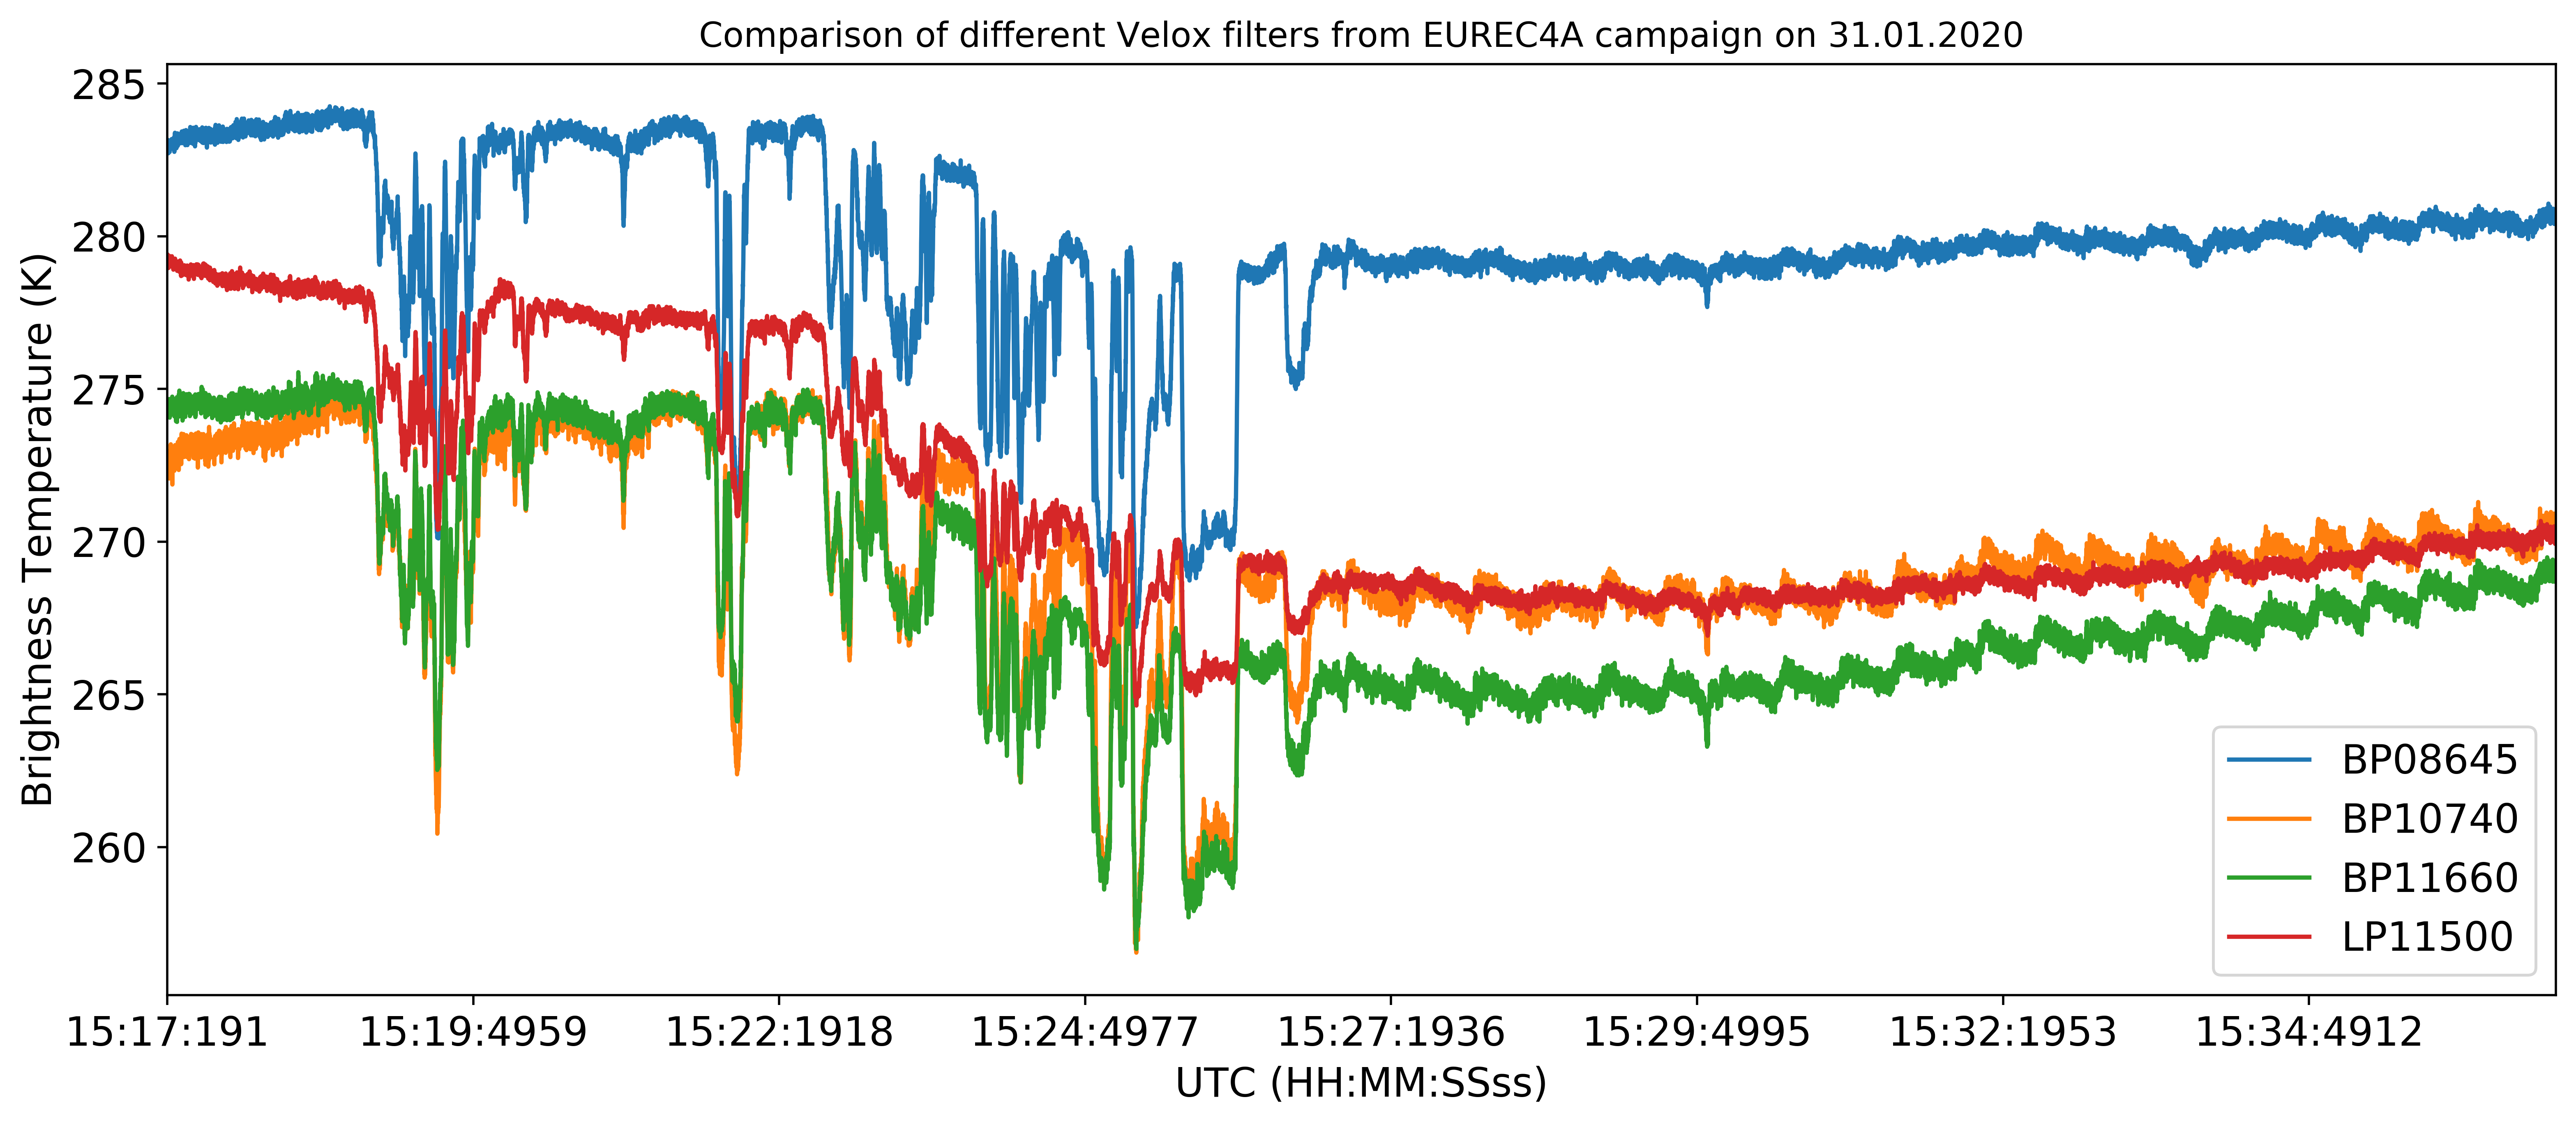

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
#df_original = pd.concat([df,df3,df_time_delta],axis=1)
df_new = pd.concat([df_add,df3],axis=1)
to_drop = ['no_filter']
foo = df_new[~df_new['Filters'].isin(to_drop)]
plt.figure(figsize=(15,6),dpi=500)
foo.set_index('datetime', inplace=True)
foo.groupby('Filters')['temperature'].plot(legend=True)
plt.title ('Comparison of different Velox filters from EUREC4A campaign on 31.01.2020')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('UTC (HH:MM:SSss)',fontsize=14)
plt.ylabel('Brightness Temperature (K)',fontsize=14)
plt.show()

In [29]:
end_date

datetime.datetime(2020, 2, 1, 10, 33, 12)